YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Capital Gains       Close Dividends        High         Low  \
Ticker               SPY         SPY       SPY         SPY         SPY   
Date                                                                     
2023-01-03           0.0  370.367889       0.0  375.823901  367.459934   
2023-01-04           0.0  373.227173       0.0  375.288982  369.570362   
2023-01-05           0.0  368.967377       0.0  371.359850  368.364398   
2023-01-06           0.0  377.428650       0.0  378.566551  368.996625   
2023-01-09           0.0  377.214630       0.0  382.894369  377.029872   
...                  ...         ...       ...         ...         ...   
2025-03-11           0.0  555.919983       0.0  564.020020  552.020020   
2025-03-12           0.0  558.869995       0.0  563.109985  553.690002   
2025-03-13           0.0  551.419983       0.0  559.109985  549.679993   
2025-03-14           0.0  562.809998       0.0  563.830017  551.489990   
2025-03-17           0.0  567.150024  

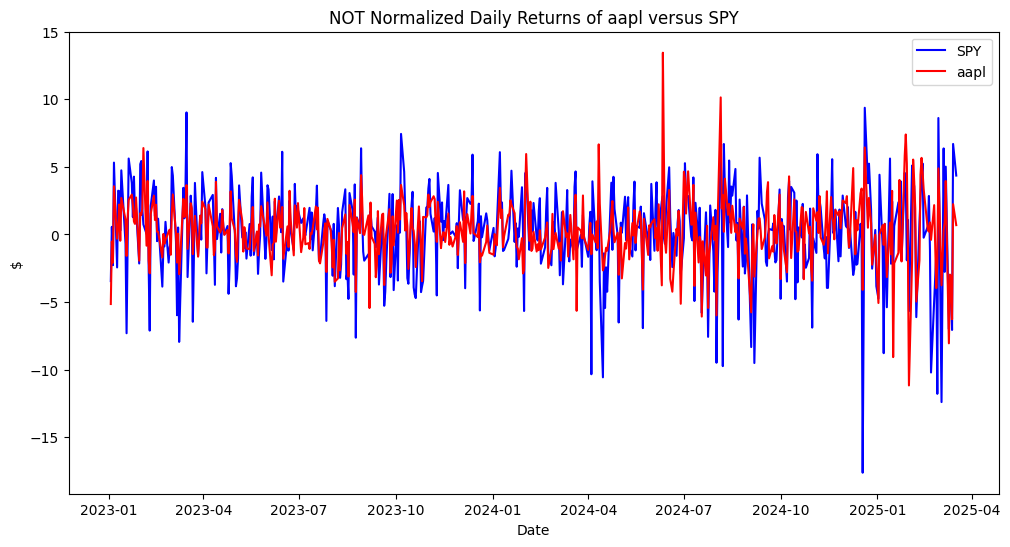

In [1]:
import yfinance as yf
import mplfinance as mpf
from datetime import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt

portfoliodict = {
    "aapl": 0.4,
    "nke": 0.1,
    "cdns": 0.3,
    "dxcm": 0.2
}

tickers = list(portfoliodict.keys())

weights = list(portfoliodict.values())

class Company:
    def __init__(self, ticker, weight):
        self.ticker = ticker
        self.weight = weight
    
    def make_company(self, start, end = datetime.now(), interval = '1d'):
        # Make a for loop to just get the first element of the column thing at the top and set equal for handling

        self.data = yf.download(self.ticker, start, end, interval)
        self.data.columns = ['Close', 'Dividends', 'High','Low', 'Open', 'Stock Splits', 'Volume']
        self.data.reset_index(names='Date', inplace = True)
        self.data['Daily Returns'] = self.data['Close'] - self.data['Open']


class Market:
    def __init__(self, ticker):
        self.ticker = ticker

    def make_market(self, start, end = datetime.now(), interval = '1d'):
        self.data = yf.download(self.ticker, start, end, interval)
        print(self.data)
        self.data.reset_index(names='Date', inplace = True)
        self.data['Daily Returns'] = self.data['Close'] - self.data['Open']

companies = []

def make_companies(tickers, start, weights):
    i = 0
    for ticker in tickers:
        company = Company(ticker, weights[i])
        company.make_company(start)
        companies.append(company)
        i += 1

make_companies(tickers, '2023-01-01', weights)

def make_market_object(ticker):
    return Market(ticker)
    
market = make_market_object('SPY')
market.make_market('2023-01-01')

aapl = companies[0]

daily_returns = pd.DataFrame()

plt.figure(figsize=(12,6))
plt.title(f'NOT Normalized Daily Returns of {aapl.ticker} versus {market.ticker}')
plt.xlabel('Date')
plt.ylabel('$')
plt.plot(market.data['Date'], market.data['Daily Returns'], color = "blue", label = f'{market.ticker}')
plt.plot(aapl.data['Date'], aapl.data['Daily Returns'], color = "red", label = f'{aapl.ticker}')
plt.legend()

# print(market)


# oidhgodfhgdfnlgn


